# Lab 6 - K-Nearest Neighbours     Handwritten Digits Dataset

#### Author: Krishna Swaroop
#### 181CO125, NITK Surathkal

# Introduction

The k-nearest neighbors (KNN) algorithm is a simple, supervised machine learning algorithm that can be used to solve both classification and regression problems. It's easy to implement and understand, but has a major drawback of becoming significantly slows as the size of that data in use grows.

# Dataset

[Optical Recognition of Handwritten Digits Dataset](https://archive.ics.uci.edu/ml/datasets/optical+recognition+of+handwritten+digits) is a multi variate dataset. It has 5620 instances and is commonly used in classification tasks. 

# K-Nearest Neighbors

## 1) Import Libraries

In [1]:
%matplotlib inline
import h5py
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 
import os
import numpy as np
from IPython.display import Image
import sys
from sklearn import datasets
from sklearn.model_selection import train_test_split 
from sklearn.neighbors import KNeighborsClassifier

## 2) Load and visualise data

In [2]:
digits = datasets.load_digits()


In [3]:
print(f"Keys of dataset: {digits.keys()}")
print(f"Official Description of dataset: {digits.DESCR}")

Keys of dataset: dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])
Official Description of dataset: .. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test s

In [4]:
print(f"Shape of images: {digits.images.shape}")
print(f"Shape of data: {digits.data.shape}")

Shape of images: (1797, 8, 8)
Shape of data: (1797, 64)


Displaying the 956th image

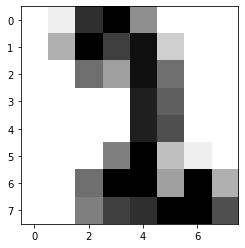

In [5]:
plt.imshow(digits.images[956], cmap=plt.cm.gray_r, interpolation='nearest')

## 3) Split data
Use ```train_test_split()``` to split the data to training and testing dataset. Here, 20% of the dataset is reserved to test our algorithm

In [6]:
X = digits.data
y = digits.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42, stratify=y)

## 4) Fit the model

For the baseline, we will fit the model with nearest neighbor count = 7

In [7]:
knn = KNeighborsClassifier(n_neighbors=7)


In [8]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                     weights='uniform')

## 5) Accuracy

In [9]:
print(f"Accuracy of KNN model with n_neighbours = 7: {knn.score(X_test, y_test)}")

Accuracy of KNN model with n_neighbours = 7: 0.9833333333333333


We have a 98.3% accuracy! Now, let us do analysis to find the perfect value of k

## 6) Analysis

We will check the train vs test accuracy for k values in between 1 and 15

In [10]:
neighbors = np.arange(1, 15)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

In [11]:
for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    train_accuracy[i] = knn.score(X_train, y_train)
    test_accuracy[i] = knn.score(X_test, y_test)

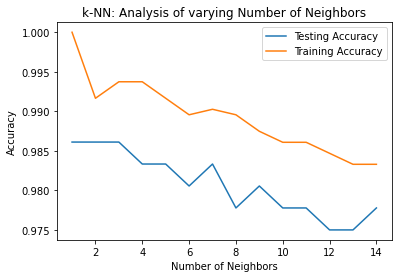

In [12]:
plt.title('k-NN: Analysis of varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

As we can see, the test accuracy progressively decreases and hits local maximas at k = 7. 

Therefore the highest accuracy gained is 98.33%